<a href="https://colab.research.google.com/github/kashishkhatwani/ML/blob/main/Property_Inspection_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Property Hazard Score prediction - Machine Learning Advanced


- Introduction
- Problem Statement
- Data Loading
-  Analysis 
- Feature Scaling
- Feature Selection
- Model Development 

<a id=section1></a>
# 1. Introduction

  



To ensure that Liberty Mutual’s portfolio of home insurance policies aligns with their business goals, many newly insured properties receive a home inspection. These inspections review the condition of key attributes of the property, including things like the foundation, roof, windows and siding. The results of an inspection help Liberty Mutual determine if the property is one they want to insure.

In this challenge, your task is to predict a transformed count of hazards or pre-existing damages using a dataset of property information. This will enable Liberty Mutual to more accurately identify high risk homes that require additional examination to confirm their insurability.

<a id=section2></a>
# 2. Problem Statement

<a id=section3></a>
# 3. Data Loading and Description

<h4>Importing Packages</h4>

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd  
# Importing for panel data analysis

pd.set_option('display.max_columns', None)                            # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                           # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                               # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                        # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)           # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                    # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                       # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                                 # Backend used for rendering and GUI integration
import seaborn as sns                                                 # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------

from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import f1_score
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # For Scaling attributes using Standard Scaler     
from sklearn.decomposition import PCA                               # To implement PCA on the dataset

from sklearn.model_selection import train_test_split                  # Importing train_test_split to split training and testing set 
              
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                   # To use Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier                    # To use KNN Classifier
from sklearn.svm import SVC                                           # To use Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier                       # To use Decision Tree Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # To apply LDA
from sklearn.model_selection import GridSearchCV                      # To use GridSearchCV 
from sklearn.ensemble import RandomForestClassifier                   # to use Random Forest
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                       # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                     # Warnings will appear only once

from sklearn import metrics


<h4>Data Loading</h4>

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/PropertyInspection_train.csv',error_bad_lines=False )
train.head()
train.shape

(50999, 34)

In [3]:
train.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,D,7,B,B,15,1,A,B,N,36,11,N,10,B,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,C,12,B,B,10,3,A,B,Y,78,10,Y,17,C,2,22,1,18,5,Y,Y,E,2,1
2,3,1,10,10,5,N,K,N,B,B,E,12,H,B,15,1,A,R,Y,71,21,Y,13,C,6,37,2,14,6,Y,Y,E,6,1
3,4,1,18,18,5,N,K,N,B,B,E,3,H,B,15,1,A,R,N,71,13,N,15,A,2,25,1,1,6,Y,N,C,2,6
4,5,1,13,19,5,N,H,N,B,B,E,7,H,B,10,1,A,J,N,75,10,Y,11,B,1,22,1,2,7,N,N,E,1,1


In [4]:
train.Hazard.nunique()

50

**Hazard which is our target varibale is continuous. Hence, this is regression problem**

Profiling using Dtale

In [5]:
#import dtale

#import pandas as pd
#d = dtale.show(train)
#d.open_browser()

In [6]:
train.Hazard.value_counts()

1     18981
4      8273
2      6145
5      3645
7      3284
3      2025
8      1783
6      1407
10     1311
11      800
9       739
13      560
14      389
12      379
16      235
17      194
15      174
19      138
18      103
20       98
22       71
25       44
23       42
28       32
21       31
26       25
24       14
29       14
30        9
31        8
34        8
32        6
27        5
42        4
40        2
37        2
35        2
36        2
46        2
38        2
41        2
44        1
69        1
39        1
49        1
51        1
52        1
33        1
64        1
63        1
Name: Hazard, dtype: int64

**Data is Right Skewed**

## Data Analysis

In Data Analysis,  we will analyse
- Missing Values
- All The Numerical Variables
- Distribution of the Numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relationship between independent and dependent feature(Hazard)

### 1. Missing Values

In [7]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')

**No missing values found**

###  2. Numeric Variables

In [8]:

# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  18


,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
0,1,1,15,3,2,7,15,1,36,11,10,2,37,1,11,6,2,2
1,2,4,16,14,5,12,10,3,78,10,17,2,22,1,18,5,2,1
2,3,1,10,10,5,12,15,1,71,21,13,6,37,2,14,6,6,1
3,4,1,18,18,5,3,15,1,71,13,15,2,25,1,1,6,2,6
4,5,1,13,19,5,7,10,1,75,10,11,1,22,1,2,7,1,1


There are 18 numerical features. Let us now evaluate discrete and continous in these 18 numerical features

In [9]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in ['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 13


Out of 18 numerical features, 13 are discrete variables

In [10]:

discrete_feature

['T1_V1',
 'T1_V2',
 'T1_V3',
 'T1_V10',
 'T1_V13',
 'T1_V14',
 'T2_V4',
 'T2_V6',
 'T2_V7',
 'T2_V8',
 'T2_V10',
 'T2_V14',
 'T2_V15']

In [11]:
print(train[discrete_feature].nunique())
train[discrete_feature].head()

T1_V1     19
T1_V2     24
T1_V3      9
T1_V10     5
T1_V13     4
T1_V14     5
T2_V4     22
T2_V6      7
T2_V7      7
T2_V8      3
T2_V10     7
T2_V14     7
T2_V15    12
dtype: int64


,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V4,T2_V6,T2_V7,T2_V8,T2_V10,T2_V14,T2_V15
0,15,3,2,7,15,1,10,2,37,1,6,2,2
1,16,14,5,12,10,3,17,2,22,1,5,2,1
2,10,10,5,12,15,1,13,6,37,2,6,6,1
3,18,18,5,3,15,1,15,2,25,1,6,2,6
4,13,19,5,7,10,1,11,1,22,1,7,1,1


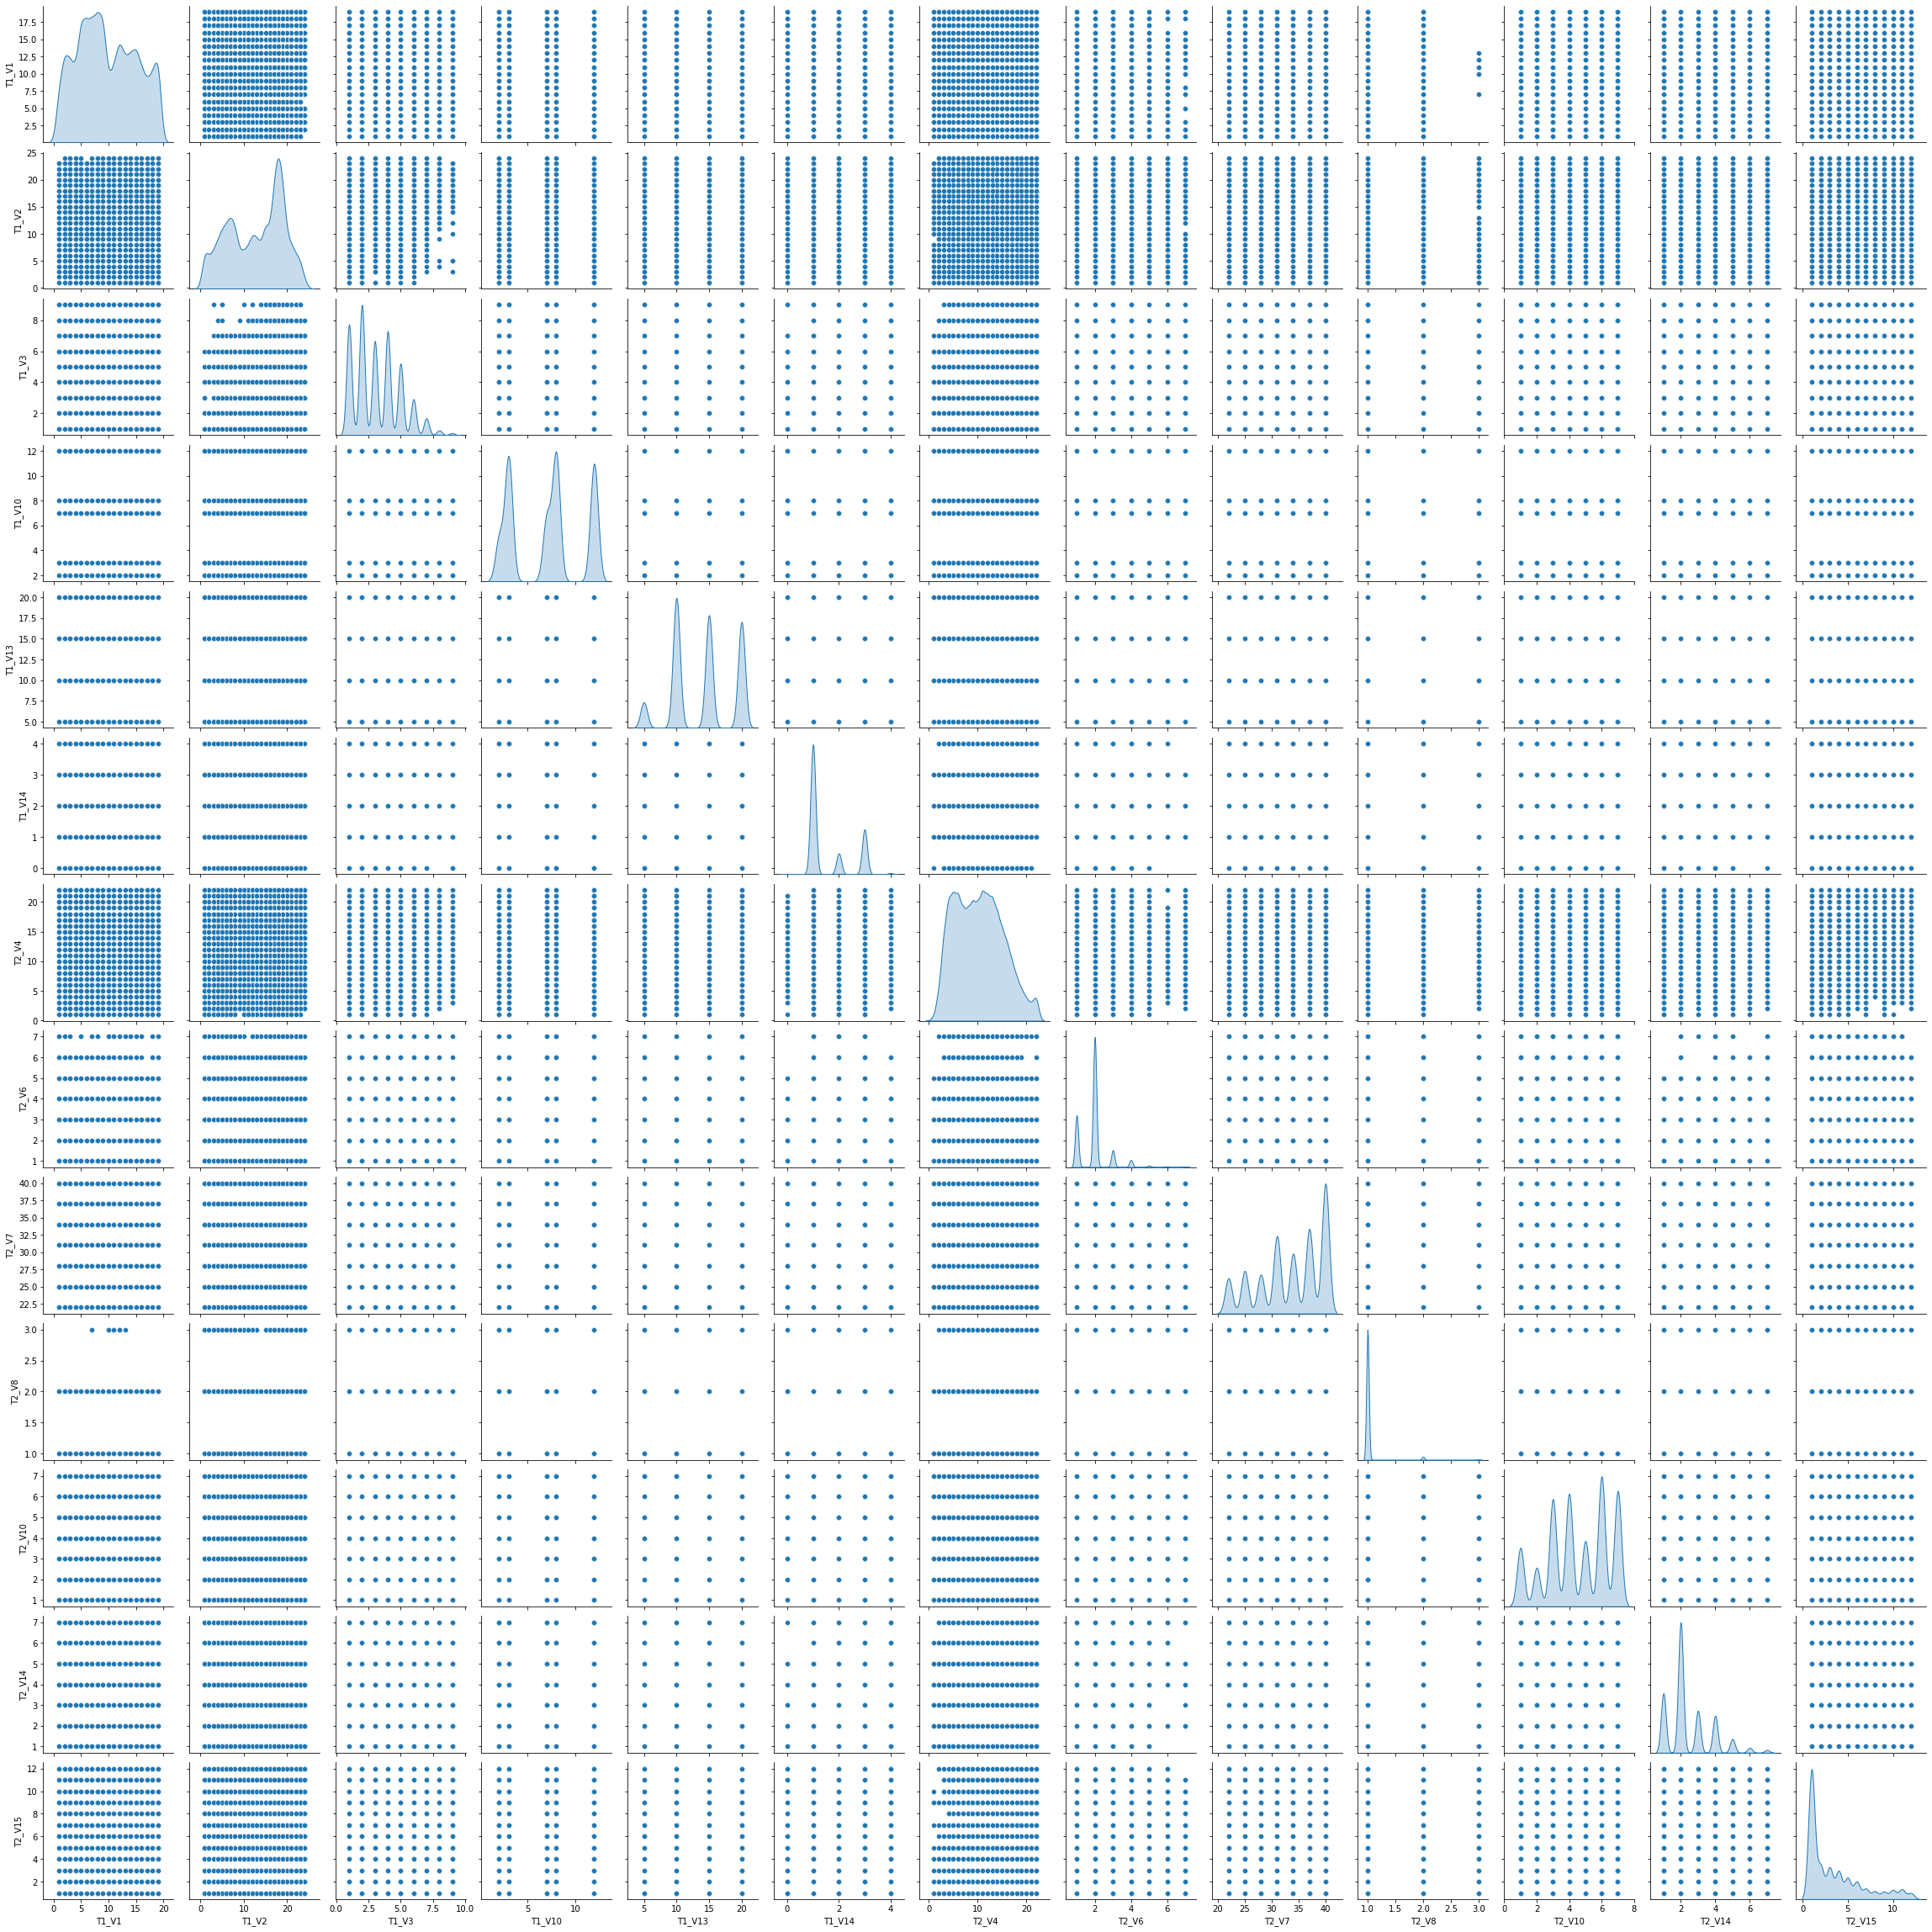

In [12]:

sns.pairplot(train[discrete_feature],diag_kind='kde')

In [13]:
train[train['Hazard']>10].head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
11,24,15,18,15,4,N,H,Y,B,B,E,3,M,B,15,1,A,R,N,23,7,Y,5,B,2,34,1,1,2,Y,N,E,2,4
14,31,14,11,23,2,N,K,N,B,B,E,3,H,B,20,1,A,K,N,41,11,N,15,A,1,40,1,18,3,Y,N,E,1,1
23,58,16,9,5,2,N,K,N,B,B,E,8,M,B,15,3,A,K,N,18,14,N,13,A,2,25,1,21,6,Y,N,E,2,2
56,129,11,17,17,3,B,B,Y,B,B,D,12,B,B,10,3,A,I,N,46,8,N,13,A,2,40,1,11,4,Y,N,E,2,3
60,139,13,8,10,3,N,K,N,A,A,F,12,H,B,15,1,A,N,N,55,11,Y,3,C,1,25,1,23,5,Y,N,E,1,1


#### Continous features


In [14]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


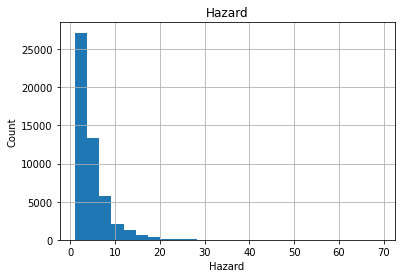

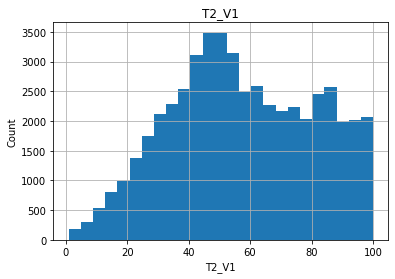

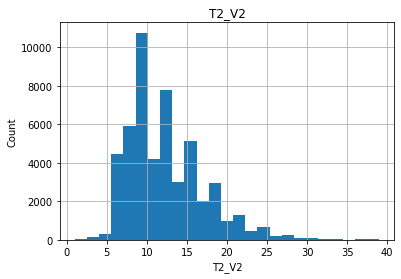

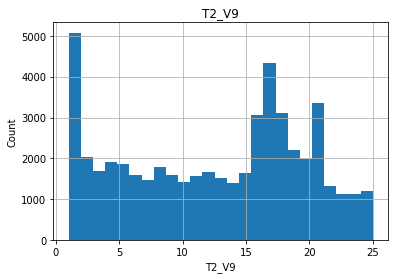

In [15]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**Continuous variables are not normally distributed**
T2_V1, T2_V2, T2_V9 do not have 0 value - so we can use log transformation as these are not normally distributed


#### Outliers

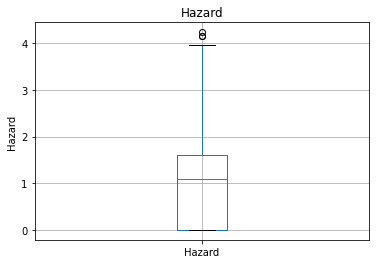

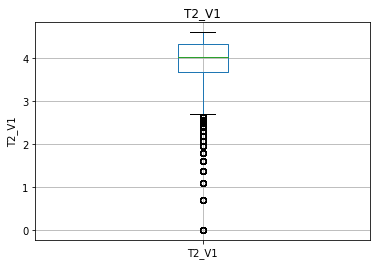

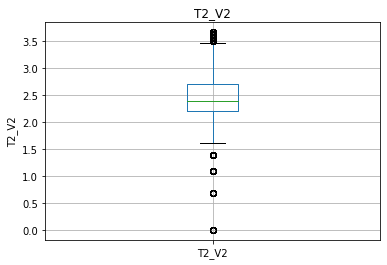

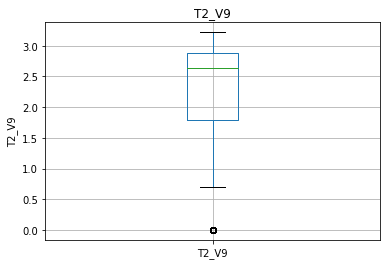

In [16]:
for feature in continuous_feature:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [17]:
'''
## We will be using logarithmic transformation


for feature in continuous_feature:
        data=train.copy()
        train[feature]=np.log(train[feature])
        plt.scatter(data[feature],data['Hazard'])
        plt.xlabel(feature)
        plt.ylabel('Hazard')
        plt.title(feature)
        plt.show()
'''

"\n## We will be using logarithmic transformation\n\n\nfor feature in continuous_feature:\n        data=train.copy()\n        train[feature]=np.log(train[feature])\n        plt.scatter(data[feature],data['Hazard'])\n        plt.xlabel(feature)\n        plt.ylabel('Hazard')\n        plt.title(feature)\n        plt.show()\n"

### this shows there is no relation with Target variable 

**there are outliers for few continuous features**

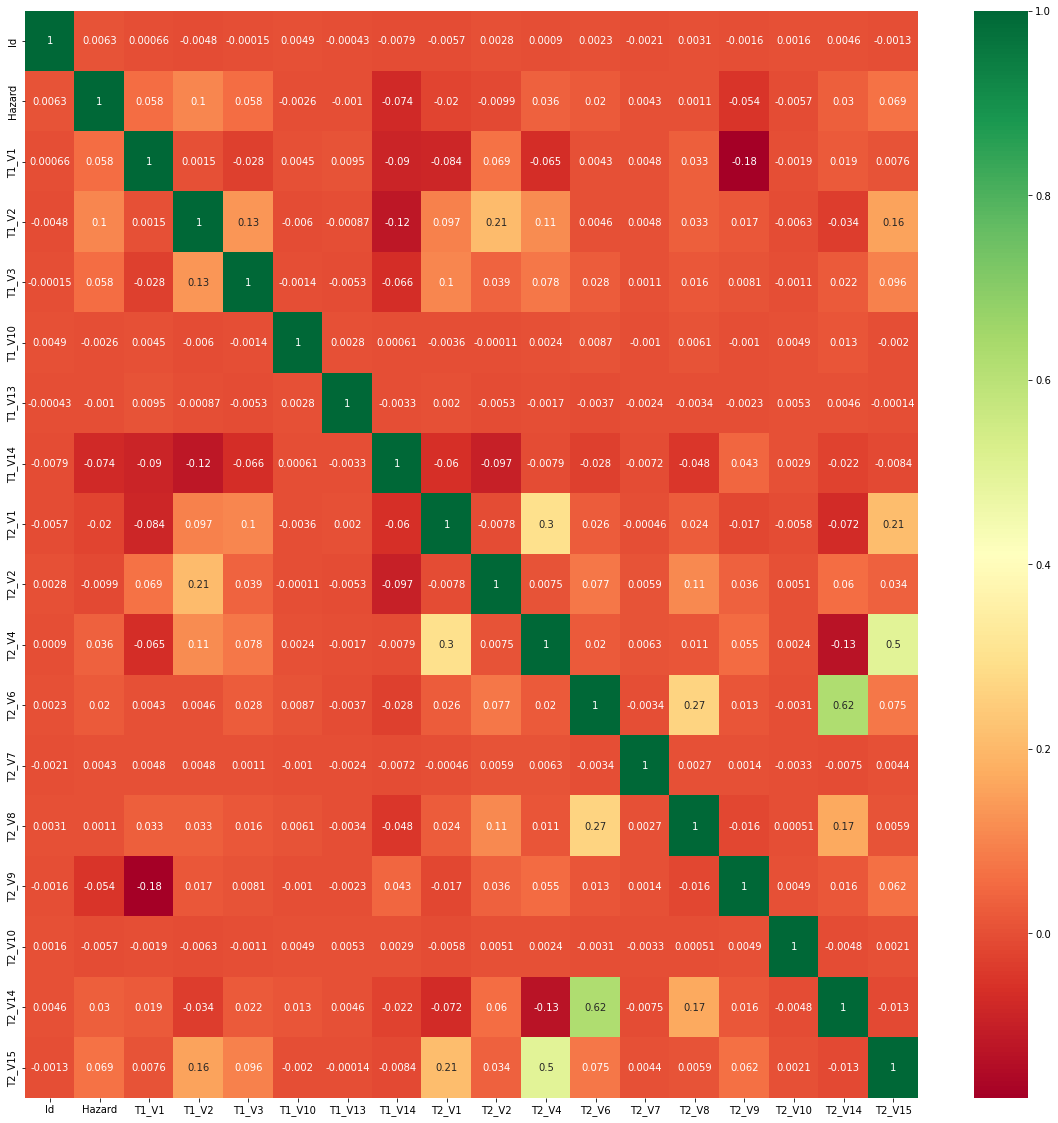

In [18]:
## Correlation

plt.figure(figsize=(20,20))

sns.heatmap(train.corr(), annot=True,cmap="RdYlGn")

### Categorial features

In [19]:
categorical_features=[feature for feature in train.columns if data[feature].dtypes=='O']
print(len(categorical_features))

16


In [20]:
#lets check cardinality of each of the category i.e how many different category each categorical features has

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is T1_V4 and number of categories are 8
The feature is T1_V5 and number of categories are 10
The feature is T1_V6 and number of categories are 2
The feature is T1_V7 and number of categories are 4
The feature is T1_V8 and number of categories are 4
The feature is T1_V9 and number of categories are 6
The feature is T1_V11 and number of categories are 12
The feature is T1_V12 and number of categories are 4
The feature is T1_V15 and number of categories are 8
The feature is T1_V16 and number of categories are 18
The feature is T1_V17 and number of categories are 2
The feature is T2_V3 and number of categories are 2
The feature is T2_V5 and number of categories are 6
The feature is T2_V11 and number of categories are 2
The feature is T2_V12 and number of categories are 2
The feature is T2_V13 and number of categories are 5


#### Find out the relationship between categorical variable and dependent feature Hazard score

## Feature Scaling 

In [21]:
for feature in categorical_features:
    labels_ordered=train.groupby([feature])['Hazard'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train[feature]=train[feature].map(labels_ordered)

In [22]:
train.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,6,5,1,2,1,2,7,2,1,15,1,5,1,1,36,11,1,10,0,2,37,1,11,6,1,1,1,2,2
1,2,4,16,14,5,7,5,1,2,1,0,12,2,1,10,3,5,1,0,78,10,0,17,2,2,22,1,18,5,1,0,1,2,1
2,3,1,10,10,5,6,7,1,2,1,5,12,9,1,15,1,5,12,0,71,21,0,13,2,6,37,2,14,6,1,0,1,6,1
3,4,1,18,18,5,6,7,1,2,1,5,3,9,1,15,1,5,12,1,71,13,1,15,1,2,25,1,1,6,1,1,2,2,6
4,5,1,13,19,5,6,3,1,2,1,5,7,9,1,10,1,5,15,1,75,10,0,11,0,1,22,1,2,7,0,1,1,1,1


In [23]:
def categorize_risk(r):
    if r.Hazard > 10:
        return 'High'
    elif r.Hazard >=3:
        return 'Medium'
    else:
        return 'Low'

In [24]:
train['Hazard_cat']=train.apply(categorize_risk, axis=1)
#carsales_df.apply(categorize_class, axis=1)

In [25]:
train.Hazard_cat.value_counts()

Low       25126
Medium    22467
High       3406
Name: Hazard_cat, dtype: int64

In [26]:
train.drop('Hazard', axis=1, inplace=True)

In [27]:
train.head()

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15,Hazard_cat
0,1,15,3,2,6,5,1,2,1,2,7,2,1,15,1,5,1,1,36,11,1,10,0,2,37,1,11,6,1,1,1,2,2,Low
1,2,16,14,5,7,5,1,2,1,0,12,2,1,10,3,5,1,0,78,10,0,17,2,2,22,1,18,5,1,0,1,2,1,Medium
2,3,10,10,5,6,7,1,2,1,5,12,9,1,15,1,5,12,0,71,21,0,13,2,6,37,2,14,6,1,0,1,6,1,Low
3,4,18,18,5,6,7,1,2,1,5,3,9,1,15,1,5,12,1,71,13,1,15,1,2,25,1,1,6,1,1,2,2,6,Low
4,5,13,19,5,6,3,1,2,1,5,7,9,1,10,1,5,15,1,75,10,0,11,0,1,22,1,2,7,0,1,1,1,1,Low


In [28]:
feature_scale=[feature for feature in train.columns if feature not in ['Id','Hazard_cat']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train[feature_scale])
train[feature_scale]=scaler.transform(train[feature_scale])





In [29]:
train.head()

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15,Hazard_cat
0,1,0.78,0.09,0.12,0.86,0.56,1.00,0.67,0.33,0.40,0.50,0.18,0.33,0.67,0.25,0.71,0.06,1.00,0.35,0.26,1.00,0.43,0.00,0.17,0.83,0.00,0.42,0.83,1.00,1.00,0.25,0.17,0.09,Low
1,2,0.83,0.57,0.50,1.00,0.56,1.00,0.67,0.33,0.00,1.00,0.18,0.33,0.33,0.75,0.71,0.06,0.00,0.78,0.24,0.00,0.76,0.40,0.17,0.00,0.00,0.71,0.67,1.00,0.00,0.25,0.17,0.00,Medium
2,3,0.50,0.39,0.50,0.86,0.78,1.00,0.67,0.33,1.00,1.00,0.82,0.33,0.67,0.25,0.71,0.71,0.00,0.71,0.53,0.00,0.57,0.40,0.83,0.83,0.50,0.54,0.83,1.00,0.00,0.25,0.83,0.00,Low
3,4,0.94,0.74,0.50,0.86,0.78,1.00,0.67,0.33,1.00,0.10,0.82,0.33,0.67,0.25,0.71,0.71,1.00,0.71,0.32,1.00,0.67,0.20,0.17,0.17,0.00,0.00,0.83,1.00,1.00,0.50,0.17,0.45,Low
4,5,0.67,0.78,0.50,0.86,0.33,1.00,0.67,0.33,1.00,0.50,0.82,0.33,0.33,0.25,0.71,0.88,1.00,0.75,0.24,0.00,0.48,0.00,0.00,0.00,0.00,0.04,1.00,0.00,1.00,0.25,0.00,0.00,Low


In [30]:
import scipy.stats as stats

In [31]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

### Feature selection 

### Feature selection method - VIF 

In [32]:
train.drop('Id', axis=1, inplace=True)

In [33]:
X = train.drop(['Hazard_cat'], axis=1)
y= train['Hazard_cat']

In [34]:
y.value_counts()

Low       25126
Medium    22467
High       3406
Name: Hazard_cat, dtype: int64

In [35]:
#Threshold as 20
#x = demo.drop('class',axis=1)
#x = x.drop('mass',axis=1)
#x = x.drop('plas',axis=1)
#y = demo[["class"]]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,4.48,T1_V1
1,5.12,T1_V2
2,2.67,T1_V3
3,4.18,T1_V4
4,7.28,T1_V5
5,2.25,T1_V6
6,30.77,T1_V7
7,6.93,T1_V8
8,38.94,T1_V9
9,2.91,T1_V10


In [36]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(X.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # create a column of variable names
    vif["Features"] = X.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 20]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        X = X.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor Features
0         4.41    T1_V1
1         5.10    T1_V2
2         2.65    T1_V3
3         4.17    T1_V4
4         6.96    T1_V5
5         2.24    T1_V6
6         6.79    T1_V8
7         2.89   T1_V10
8         7.36   T1_V12
9         4.55   T1_V13
10        4.34   T1_V14
11       17.65   T1_V15
12        7.26   T1_V16
13        5.81   T1_V17
14        8.16    T2_V1
15        6.96    T2_V2
16        3.03    T2_V3
17        6.81    T2_V4
18        3.00    T2_V5
19        4.24    T2_V6
20        4.68    T2_V7
21        1.15    T2_V8
22        3.52    T2_V9
23        4.23   T2_V10
24        5.30   T2_V11
25        3.67   T2_V13
26        3.98   T2_V14
27        2.32   T2_V15


In [37]:
X.shape

(50999, 28)

In [38]:
X.head()

,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V8,T1_V10,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V13,T2_V14,T2_V15
0,0.78,0.09,0.12,0.86,0.56,1.00,0.33,0.50,0.33,0.67,0.25,0.71,0.06,1.00,0.35,0.26,1.00,0.43,0.00,0.17,0.83,0.00,0.42,0.83,1.00,0.25,0.17,0.09
1,0.83,0.57,0.50,1.00,0.56,1.00,0.33,1.00,0.33,0.33,0.75,0.71,0.06,0.00,0.78,0.24,0.00,0.76,0.40,0.17,0.00,0.00,0.71,0.67,1.00,0.25,0.17,0.00
2,0.50,0.39,0.50,0.86,0.78,1.00,0.33,1.00,0.33,0.67,0.25,0.71,0.71,0.00,0.71,0.53,0.00,0.57,0.40,0.83,0.83,0.50,0.54,0.83,1.00,0.25,0.83,0.00
3,0.94,0.74,0.50,0.86,0.78,1.00,0.33,0.10,0.33,0.67,0.25,0.71,0.71,1.00,0.71,0.32,1.00,0.67,0.20,0.17,0.17,0.00,0.00,0.83,1.00,0.50,0.17,0.45
4,0.67,0.78,0.50,0.86,0.33,1.00,0.33,0.50,0.33,0.33,0.25,0.71,0.88,1.00,0.75,0.24,0.00,0.48,0.00,0.00,0.00,0.00,0.04,1.00,0.00,0.25,0.00,0.00


## Models


7.2 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [39]:
#y=y.astype('int')

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [41]:
y_train.head()

32729       Low
2519     Medium
25906       Low
48086    Medium
9092     Medium
Name: Hazard_cat, dtype: object

In [42]:
y_train.shape

(38249,)

<a name = Section31></a>
### **3.1 Installing Libraries**

In [43]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance               

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [44]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [45]:
!pip install yellowbrick
#import yellowbrick
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
#from yellowbrick.model_selection import FeatureImportances          # To retrieve Feature Importances over model
from sklearn.metrics import classification_report                   # To generate classification report of the model
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To perform train, test and split over the data
from sklearn.linear_model import LogisticRegression                 # To perform modeling using LogisticRegression
from sklearn.svm import SVC                                         # To perform modeling using SVC
from sklearn.tree import DecisionTreeClassifier                     # To perform modeling using DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from sklearn.ensemble import VotingClassifier                       # To perform modeling using VotingClassifier
from sklearn.ensemble import BaggingClassifier                      # To perform modeling using BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier                     # To perform modeling using AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier             # To perform modeling using GradientBoostingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
from sklearn.tree import DecisionTreeRegressor

In [46]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import StackingClassifier                     # To perform modeling using StackingClassifier

#import Xgboost

In [47]:


#!pip install libomp



In [48]:
pip install xgboost


In [49]:
# ('logistic', LogisticRegression(random_state=0)), 

In [50]:
X_train.shape

(38249, 28)

In [51]:
X.columns

Index(['T1_V1', 'T1_V2', 'T1_V3', 'T1_V4', 'T1_V5', 'T1_V6', 'T1_V8', 'T1_V10',
       'T1_V12', 'T1_V13', 'T1_V14', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V1',
       'T2_V2', 'T2_V3', 'T2_V4', 'T2_V5', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9',
       'T2_V10', 'T2_V11', 'T2_V13', 'T2_V14', 'T2_V15'],
      dtype='object')

<a name = Section73></a>
### **7.3 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

**Observation:**

- Now that we have split our data we are **ready** to move to the **next part** and that is Model Development & Evaluation.

## Handling Data Imbalance

In [52]:
!pip install imbalanced-learn

In [53]:
!pip install --upgrade imbalanced-learn

#### Random Oversampling

In [54]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [55]:
#!pip install Pipeline
#!pip install delayed


from imblearn.pipeline import Pipeline
from sklearn.utils.fixes import delayed
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier


In [57]:
# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=({'High':22000}) )

In [58]:
y.value_counts()

Low       25126
Medium    22467
High       3406
Name: Hazard_cat, dtype: int64

In [59]:
# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [60]:
y_over.value_counts()

Low       25126
Medium    22467
High      22000
Name: Hazard_cat, dtype: int64

In [61]:
# Summarize original and new class distribution
print(Counter(y))
print(Counter(y_over))

Counter({'Low': 25126, 'Medium': 22467, 'High': 3406})
Counter({'Low': 25126, 'Medium': 22467, 'High': 22000})


In [62]:
# Define pipeline
dt_clf = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
steps = [('over', RandomOverSampler(sampling_strategy=({'High':25000}))), ('model', AdaBoostClassifier(base_estimator=dt_clf, n_estimators=500, random_state=42))]
pipeline = Pipeline(steps=steps)

In [63]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_over, y_over, scoring='accuracy', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('accuracy : %.3f' % score)

accuracy : 0.647


In [64]:
'''
# Define pipeline
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
'''

"\n# Define pipeline\nsteps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]\npipeline = Pipeline(steps=steps)\n"

In [65]:
'''
# Evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('accuracy: %.3f' % score)
'''

"\n# Evaluate pipeline\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\nscores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)\nscore = np.mean(scores)\nprint('accuracy: %.3f' % score)\n"

In [66]:
from imblearn.over_sampling import SMOTE

In [82]:
# Transform the dataset
oversample = SMOTE(sampling_strategy=({'High':20000}))
X_new, y_new = oversample.fit_resample(X, y)

In [83]:
counter = Counter(y_new)
print(counter)

Counter({'Low': 25126, 'Medium': 22467, 'High': 20000})


In [84]:
# Define pipeline
steps = [('over', SMOTE()), ('model', AdaBoostClassifier(base_estimator=dt_clf, n_estimators=500, random_state=42))]
pipeline = Pipeline(steps=steps)

In [85]:
# Evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_new, y_new, scoring='accuracy', cv=cv, n_jobs=-1)
print('accuracy Score: %.3f' % np.mean(scores))

accuracy Score: 0.567


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=0)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will develop variety of models such as: 

|Logistic Regression|Decision Tree|Random Forest|Bagging|Adaptive Boosting|Gradient Boosting|Voting Classifier|
|:--|:--|:--|:--|:--|:--|:--|

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

- Considering the complexity of data, we can run a **loop** over multiple **classifiers** and estimate the accuracy of the model.

- But in a real-life situation, one must train the model individually as then decide which model is best in which situation.

In [87]:
# Initialize classifiers
log_clf = LogisticRegression(random_state = 42, class_weight='balanced')
#sv_clf = SVC(random_state=42, class_weight='balanced', probability=True)
dt_clf = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
rf_clf = RandomForestClassifier(n_estimators=500, random_state = 42, class_weight='balanced', n_jobs=-1)
bag_clf = BaggingClassifier(base_estimator=dt_clf, n_estimators=500, n_jobs=-1, random_state=42)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('dt', dt_clf)], voting='soft')

ada_clf = AdaBoostClassifier(base_estimator=dt_clf, n_estimators=500, random_state=42)
gb_clf = GradientBoostingClassifier(max_depth=20,n_estimators=300, random_state = 42)

In [73]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [88]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf,  dt_clf, bag_clf, voting_clf, rf_clf, ada_clf, gb_clf]

# Create an empty list to append scores and classifier name
train_scores = []
test_scores = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_train, y_train)

  # Append train and test score to the empty list
  train_scores.append(np.round(a=clf.score(X_train, y_train), decimals=2))
  test_scores.append(np.round(a=clf.score(X_test, y_test), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')

Success!
CPU times: user 22min 17s, sys: 17.7 s, total: 22min 34s
Wall time: 26min


In [89]:
# Create an accuracy dataframe from scores and names list
accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores}, index=clf_names)

# View the accuracy of all the classifiers
accuracy_frame.transpose()

,LogisticRegression,DecisionTreeClassifier,BaggingClassifier,VotingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
Train Accuracy,0.47,1.00,1.00,1.00,1.00,1.00,1.00
Test Accuracy,0.47,0.58,0.65,0.59,0.66,0.58,0.65


**Observation:**

- The highest **accuracy** achieved on the **test set** is **46%** which is given by **GradientBoostingClassifier, Random ForestClassifier, Bagging Classifier**, but the train accuracy of these classifiers are 100%, which indicates overfitting

- The next best model in the line is **BaggingClassifier** which gave us an **accuracy** of **68%**.

- We see that each **ensemble** classifier is **better** compared to the **individual** classifier. 

<a name = Section7></a>

---
# **7. Model Development & Evaluation**
---

- In this section we will develop stacking classifier with the help of different estimators such as:
  - Logistic Regression
  - Support Vector Classifier
  - K Nearest Neighbor Classifier
  - Random Forest Classifier
  - Gradient Boosting Classifier

- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

In [90]:
%%time
# Creating a collection of estimators
estimators = [('logistic', LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)), 
            # ('Gradient boosting', GradientBoostingClassifier(random_state=42)),
         ('Bagging Classifier', BaggingClassifier(random_state=42)),
             ('Decision Tree', DecisionTreeClassifier(random_state=0)),
            ('knn', KNeighborsClassifier(n_jobs=-1)),
              #  ('svc', SVC(class_weight='balanced', random_state=42, probability=True)),
              ('randomforest', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42))]

#level1 = LogisticRegression()
#level1=DecisionTreeClassifier(random_state=0)
level1 = GradientBoostingClassifier(random_state=42)
#level1 = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
# Setting StackingClassifier with initiated estimators and a final estimator
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=level1, 
                               n_jobs=-1, cv=5)
stack_clf.fit(X_train, y_train)
y_pred_test =stack_clf.predict(X_test)
y_pred_train=stack_clf.predict(X_train)                                                 # make predictions on the testing set
#y_pred_test=np.exp(y_pred_test) 
#y_pred_train=np.exp(y_pred_train)
        #end = time.time()
        #timetaken.append(end - begin)
#test_accuracy.append(f1_score(y_test, y_pred))
#train_accuracy.append(f1_score(y_train,y_train_pred))
print('F1 score train', f1_score(y_train,y_pred_train, average='macro'))
print('F1 score test', f1_score(y_test,y_pred_test, average='macro'))
print('Classification',classification_report(y_train,y_pred_train))
print('Classification',classification_report(y_test,y_pred_test))
# Display the accuracy on train data and test data
print('Accuracy on Train data:', np.round(a=stack_clf.score(X_train, y_train), decimals=2))
print('Accuracy on Test data:', np.round(a=stack_clf.score(X_test, y_test), decimals=2))

F1 score train 0.9601721320841721
F1 score test 0.6826261143367889
Classification               precision    recall  f1-score   support

        High       1.00      1.00      1.00     14931
         Low       0.99      0.89      0.94     18961
      Medium       0.89      0.99      0.94     16802

    accuracy                           0.96     50694
   macro avg       0.96      0.96      0.96     50694
weighted avg       0.96      0.96      0.96     50694

Classification               precision    recall  f1-score   support

        High       0.95      0.92      0.94      5069
         Low       0.57      0.67      0.62      6165
      Medium       0.54      0.46      0.49      5665

    accuracy                           0.67     16899
   macro avg       0.69      0.68      0.68     16899
weighted avg       0.68      0.67      0.67     16899

Accuracy on Train data: 0.96
Accuracy on Test data: 0.67
CPU times: user 9min 55s, sys: 12.3 s, total: 10min 7s
Wall time: 10min 24s


**Observation:**

- We can **observe** that **results** obtained by stacking of models are **generalizing well** on test data.

- In the last notebook, we achieved **99% accuracy** on the **train set** and **68% accuracy** on the **test set**.

- Now we can see that **overfitting** is **under control** by using a stacked generalization. 

<a name = Section8></a>

---
# **8. Conclusion**
---

- We **studied** the **characteristics** and **distribution** of data in brief.

- We investigated in-depth the **features** which to **retain** and which to **discard**.

- We performed **model development** by using a stacked generalization of a variety of algorithms.

- We observed **better results** as compared to the results obtained in the last notebook.

- This model will **help** the **company** in **saving** lot of **resources** (money, human resources, etc.).

- We **recommend** you to **experiment** with **more hyperparameter** and try to enhance the results of the model.